Finite Volume Method for Solid Mechanics
======
***

Navier-Stokes Equation
======
***


Navier-Stokes equation: 
$$\frac{\partial^2 (\rho u)}{\partial t^2} - \nabla  \cdot \sigma = \rho f$$

where $\rho$ is the density, $u$ is the displacement vector, $\sigma$ is the stress tensor and $f$ is the body forces.

Assuming no body forces, $ f = 0$:

$$\frac{\partial^2 (\rho u)}{\partial t^2} - \nabla \cdot \sigma = 0$$

Assuming density is constant thoughout the domain and integrating over a Control Volume (CV):

$$ \rho \int_V \frac{\partial^2 (u)}{\partial t^2} \, dV - \int_V \nabla \cdot \sigma \, dV = 0$$ 

Gauss' Divergence Theorem states: 

$$\int_V \nabla \cdot F \, dV= \oint_S F \cdot n \, dS$$

where $F$ is any vector field, and $n$ is the outward pointing unit vector on the CV surface.

Applying this to above: 

$$ \underbrace{  \rho \int_V \frac{\partial^2 (u)}{\partial t^2} \, dV }_{Temporal\space term} -\underbrace{ \oint_S \sigma \cdot n \, dS }_{Diffusion\space term} = 0$$


Temporal Term Discretization
======
***

$$ \frac{\partial^2 u}{\partial t^2} = \frac{u^n - 2u^o + u^{oo}}{\Delta t^2} $$

$n$ = new, $o$ = old, $oo$ = old, old

$$  \rho \int_V \frac{\partial^2 u}{\partial t^2} \, dV = \rho \int_V \frac{u^n - 2u^o + u^{oo}}{\Delta t^2} \, dV = \frac{\rho}{\Delta t^2} \left( \int_V u^n \, dV -2\int_V u^o \, dV + \int_V u^{oo} \, dV \right) $$

From Spatial Variation:

$$ \int u(x)\, dV = u_p V $$

$$  \rho \int_V \frac{\partial^2 u}{\partial t^2} \, dV =  \frac{\rho}{\Delta t^2} \left(  u_p^n V^n -2 u_p^o V^o + u_p^{oo} V^{oo} \right) $$


Diffusion Term Discretization
======
***

$$\begin{align} \oint_S \sigma \cdot n \, dS & = \sum_{f=1}^{nFaces} \int_{S_f} \sigma_f \cdot n \, dS_f \\ & = \sum_{f=1}^{nFaces} \sigma_f \cdot n |S_f|  \\ 
& =  \sum_{f=1}^{nFaces} \sigma_f \cdot \bold{S_f} \end{align} $$

where $\bold{S_f}$ is the Surface Area vector


Linear Elastic Consitutive Law:

$$ \sigma = 2 \mu \epsilon + \lambda tr(\epsilon)I $$

$$ \epsilon = \dfrac{1}{2}[\nabla u + (\nabla u)^T] $$

For 2D:

$$ \bold{u} = 
\begin{bmatrix}
u & v
\end{bmatrix}
$$

$$ \nabla = 
\begin{bmatrix}
\dfrac{\delta}{\delta x} \\ \dfrac{\delta}{\delta y}
\end{bmatrix}
$$

$$
\nabla \bold{u} = \begin{bmatrix} \dfrac{\delta}{\delta x} \\ \dfrac{\delta}{\delta y} \end{bmatrix} \begin{bmatrix} u & v \end{bmatrix}
=
\begin{bmatrix}
\dfrac{\delta u}{\delta x} & \dfrac{\delta v}{\delta x} \\ \dfrac{\delta u }{\delta y} & \dfrac{\delta v }{\delta y}
\end{bmatrix}
$$

$$
\epsilon  = \dfrac{1}{2}\left[
\begin{bmatrix}
\dfrac{\delta u}{\delta x} & \dfrac{\delta v}{\delta x} \\ \dfrac{\delta u }{\delta y} & \dfrac{\delta v }{\delta y}
\end{bmatrix}
+ 
\begin{bmatrix}
\dfrac{\delta u}{\delta x} & \dfrac{\delta u }{\delta y} \\ \dfrac{\delta v}{\delta x} & \dfrac{\delta v }{\delta y}
\end{bmatrix}
\right]
$$
$$
\epsilon
=
\begin{bmatrix}
\dfrac{\delta u}{\delta x} & \dfrac{1}{2}\left(\dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y}\right) \\ \dfrac{1}{2}\left(\dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y}\right) & \dfrac{\delta v }{\delta y}
\end{bmatrix}
$$

$$ \sigma = 2 \mu \epsilon + \lambda \left(\dfrac{\delta u}{\delta x} + \dfrac{\delta v}{\delta y} \right)
\begin{bmatrix}
1 & 0 \\ 0 & 1
\end{bmatrix}
$$

$$ 
\sigma = 
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
& 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}
$$


Introducing the Stencil
======
***

The Navier-Stokes equation is solved for each CV within our mesh. In order to solve, let's look at what we need so far: 

We've shown that: 

$$ \underbrace{  \rho \int_V \frac{\partial^2 (u)}{\partial t^2} \, dV }_{Temporal\space term} -\underbrace{ \oint_S \sigma \cdot n \, dS }_{Diffusion\space term} = 0$$

can be written as: 

$$ \underbrace{ \frac{\rho}{\Delta t^2} \left(  u_p^n V^n -2 u_p^o V^o + u_p^{oo} V^{oo} \right)}_{Temporal\space term} 
-
\underbrace{
\sum_{f=1}^{nFaces} \begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
& 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y}
+ 
\lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}_f \cdot \bold{S_f}
}_{Diffusion\space term}
 = 0 $$


So for each CV what information do we need: 

### Temporal term:

$u_p^n \rightarrow$ new displacement of cell centre 

$u_p^o \rightarrow$ old displacement of cell centre 

$u_p^{oo} \rightarrow$ old, old displacement of cell centre 

$V^n \rightarrow$ new Volume of cell centre 

$V^o \rightarrow$ old Volume of cell centre 

$V^{oo} \rightarrow$ old, old Volume of cell centre 

### Diffusion term:

$\mu \rightarrow$ Shear Modulus (constant)

$\lambda \rightarrow$ Lame Modulus (constant)

For each bounding face ($f$) we need: 

$ \dfrac{\delta u}{\delta x} \rightarrow $ change of $u$ in the x-direction

$ \dfrac{\delta v}{\delta x} \rightarrow $ change of $v$ in the x-direction

$ \dfrac{\delta u}{\delta y} \rightarrow $ change of $u$ in the y-direction

$ \dfrac{\delta v}{\delta y} \rightarrow $ change of $v$ in the y-direction

In [1]:
# Remember: comments in python are denoted by the pound sign
import numpy                       #here we load numpy
from matplotlib import pyplot      #here we load matplotlib
import time, sys                   #and load some utilities


In [2]:
#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline                  

Now let's define a few variables; we want to define an evenly spaced grid of points within a spatial domain that is 2 units of length wide, i.e., $x_i\in(0,2)$.  We'll define a variable `nx`, which will be the number of grid points we want and `dx` will be the distance between any pair of adjacent grid points.  

In [3]:
nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1

We also need to set up our initial conditions. The initial velocity $u_0$ is given as 
$u = 2$ in the interval $0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

Here, we use the function `ones()` defining a `numpy` array which is `nx` elements long with every value equal to 1.

In [4]:
u = numpy.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Now let's take a look at those initial conditions using a Matplotlib plot.  We've imported the `matplotlib` plotting library `pyplot` and the plotting function is called `plot`, so we'll call `pyplot.plot`. To learn about the myriad possibilities of Matplotlib, explore the [Gallery](http://matplotlib.org/gallery.html) of example plots.

Here, we use the syntax for a simple 2D plot: `plot(x,y)`, where the `x` values are evenly distributed grid points:

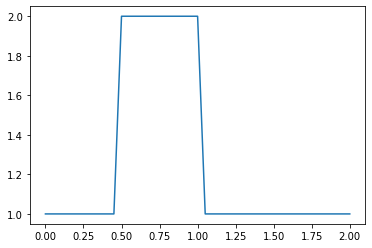

In [5]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

Why doesn't the hat function have perfectly straight sides? Think for a bit.

Now it's time to implement the discretization of the convection equation using a finite-difference scheme.  

For every element of our array `u`, we need to perform the operation $u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$

We'll store the result in a new (temporary) array `un`, which will be the solution $u$ for the next time-step.  We will repeat this operation for as many time-steps as we specify and then we can see how far the wave has convected.  

We first initialize our placeholder array `un` to hold the values we calculate for the $n+1$ timestep, using once again the NumPy function `ones()`.

Then, we may think we have two iterative operations: one in space and one in time (we'll learn differently later), so we'll start by nesting one loop inside the other. Note the use of the nifty `range()` function. When we write: `for i in range(1,nx)` we will iterate through the `u` array, but we'll be skipping the first element (the zero-th element).  *Why?*

In [6]:
un = numpy.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx): ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

**Note**—We will learn later that the code as written above is quite inefficient, and there are better ways to write this, Python-style. But let's carry on.

Now let's try plotting our `u` array after advancing in time.

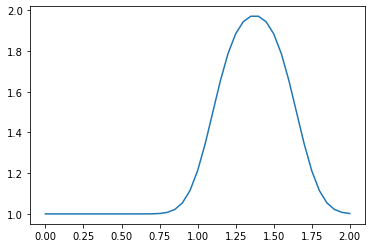

In [7]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

OK! So our hat function has definitely moved to the right, but it's no longer a hat.  **What's going on?**

Learn More
-----
***

For a more thorough explanation of the finite-difference method, including topics like the truncation error, order of convergence and other details, watch **Video Lessons 2 and 3** by Prof. Barba on YouTube.

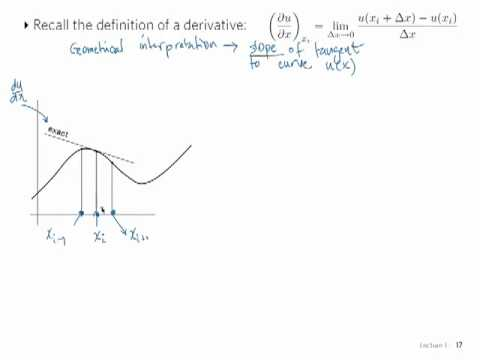

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('iz22_37mMkk')

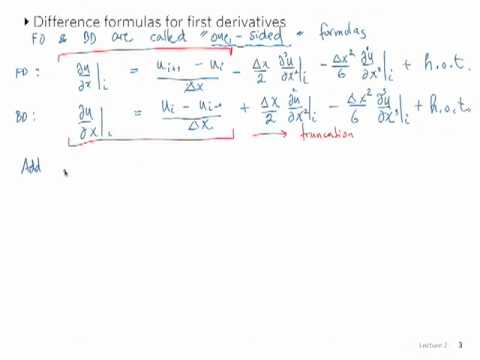

In [9]:
YouTubeVideo('xq9YTcv-fQg')

For a careful walk-through of the discretization of the linear convection equation with finite differences (and also the following steps, up to Step 4), watch **Video Lesson 4** by Prof. Barba on YouTube.

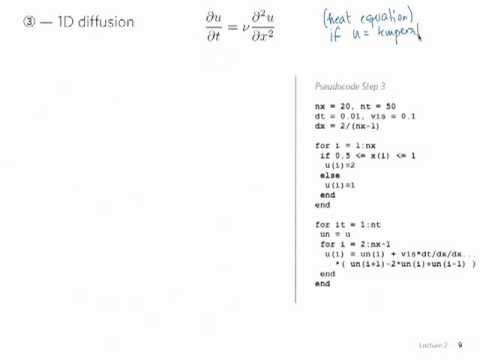

In [10]:
YouTubeVideo('y2WaK7_iMRI')

## Last but not least

**Remember** to rewrite Step 1 as a fresh Python script or in *your own* Jupyter notebook and then experiment by changing the discretization parameters. Once you have done this, you will be ready for [Step 2](./02_Step_2.ipynb).


***

In [11]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook. We modified a style we found on the GitHub of [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).)